# Email Notification

### Libraries

In [1]:
import os
import pandas as pd
import pickle
from dotenv import load_dotenv
from email.message import EmailMessage
import ssl
import smtplib
import pickle
from datetime import datetime

### Load Events from SQL Database and Optimizer

In [2]:
# Load Combined Events from Pickle File
directory = '/home/jupyter/2. Capstone 2/0. Capstone2_App/'
file_path = os.path.join(directory, 'combined_events.pkl')

# Check if File Exists
if os.path.exists(file_path):
    with open(file_path, 'rb') as file:
        combined_events = pickle.load(file)

In [3]:
combined_events.head()

,title,start,end,color
0,Marketing Analytics Assignment 1 Study,2024-08-06T08:00:00,2024-08-06T08:30:00,#F2A799
1,Marketing Analytics Assignment 1 Study,2024-08-06T13:00:00,2024-08-06T15:30:00,#F2A799
2,Marketing Analytics Assignment 1 Study,2024-08-07T14:00:00,2024-08-07T17:30:00,#F2A799
3,Intro to Art Assignment 1 Study,2024-08-08T08:00:00,2024-08-08T08:30:00,#F2A799
4,Intro to Art Assignment 1 Study,2024-08-08T13:00:00,2024-08-08T16:00:00,#F2A799


### Format Loaded Events

In [4]:
# Function to Format Dates and Times
def format_datetime(datetime_str):
    return pd.to_datetime(datetime_str).strftime('%B %d, %Y %I:%M %p')

# Extract Date
combined_events['date'] = pd.to_datetime(combined_events['start']).dt.date

# Group by Date and Format the Information
grouped_events = combined_events.groupby('date')

formatted_info = []
for date, group in grouped_events:
    formatted_events = []
    for index, row in group.iterrows():
        title = row['title']
        start_datetime = format_datetime(row['start'])
        end_datetime = format_datetime(row['end'])
        formatted_events.append(f"    {index + 1}. {title} \n {start_datetime} - {end_datetime}")
    formatted_info.append(f"{date.strftime('%B %d, %Y')}:\n" + "\n".join(formatted_events))

final_output = "\n\n".join(formatted_info)    
    
formatted_event_info = final_output

print(formatted_event_info)

August 06, 2024:
    1. Marketing Analytics Assignment 1 Study 
 August 06, 2024 08:00 AM - August 06, 2024 08:30 AM
    2. Marketing Analytics Assignment 1 Study 
 August 06, 2024 01:00 PM - August 06, 2024 03:30 PM
    8. Baseball Practice  
 August 06, 2024 07:30 PM - August 06, 2024 08:30 PM
    13. Class: Introduction to Art History  
 August 06, 2024 09:00 AM - August 06, 2024 10:30 AM
    16. Brunch with Mom 
 August 06, 2024 10:30 AM - August 06, 2024 12:00 PM

August 07, 2024:
    3. Marketing Analytics Assignment 1 Study 
 August 07, 2024 02:00 PM - August 07, 2024 05:30 PM
    10. Class: Statistical Analysis 
 August 07, 2024 12:00 PM - August 07, 2024 01:30 PM
    21. Therapy 
 August 07, 2024 08:30 AM - August 07, 2024 09:30 AM
    22. Class: Marketing Analytics 
 August 07, 2024 09:30 AM - August 07, 2024 11:00 AM

August 08, 2024:
    4. Intro to Art Assignment 1 Study 
 August 08, 2024 08:00 AM - August 08, 2024 08:30 AM
    5. Intro to Art Assignment 1 Study 
 August 0

### Send Email Notification

In [5]:
# Email Parameters
load_dotenv()
email_sender = 'convocrafters.uchicago@gmail.com'
email_password = os.getenv('email_password')
email_receiver = 'nickramen.uchicago@gmail.com'

# Date for Subject Line
current_date = datetime.now().strftime("%m/%d/%Y")

# Load Combined Events from Pickle File
directory = '/home/jupyter/2. Capstone 2/0. Capstone2_App/'
file_path = os.path.join(directory, 'combined_events.pkl')

# Check if the File Exists
if os.path.exists(file_path):
    with open(file_path, 'rb') as file:
        combined_events = pickle.load(file)

    # Email Content
    subject = f"Ed's Schedule Digest as of {current_date}"
    body = f"""
Hello, Nick!

Here are this week's events from your calendar:

{formatted_event_info}

Good luck with your studying!

Best,

Ed
"""    

    # Create Email Message
    email = EmailMessage()
    email['From'] = email_sender
    email['To'] = email_receiver
    email['Subject'] = subject
    email.set_content(body)

    # Create SSL Context
    context = ssl.create_default_context()

    # Send Email Using SMTP_SSL
    with smtplib.SMTP_SSL('smtp.gmail.com', 465, context=context) as smtp:
        smtp.login(email_sender, email_password)
        smtp.sendmail(email_sender, email_receiver, email.as_string())
else:
    print(f"File Not Found: {file_path}")

### Receipt of Email

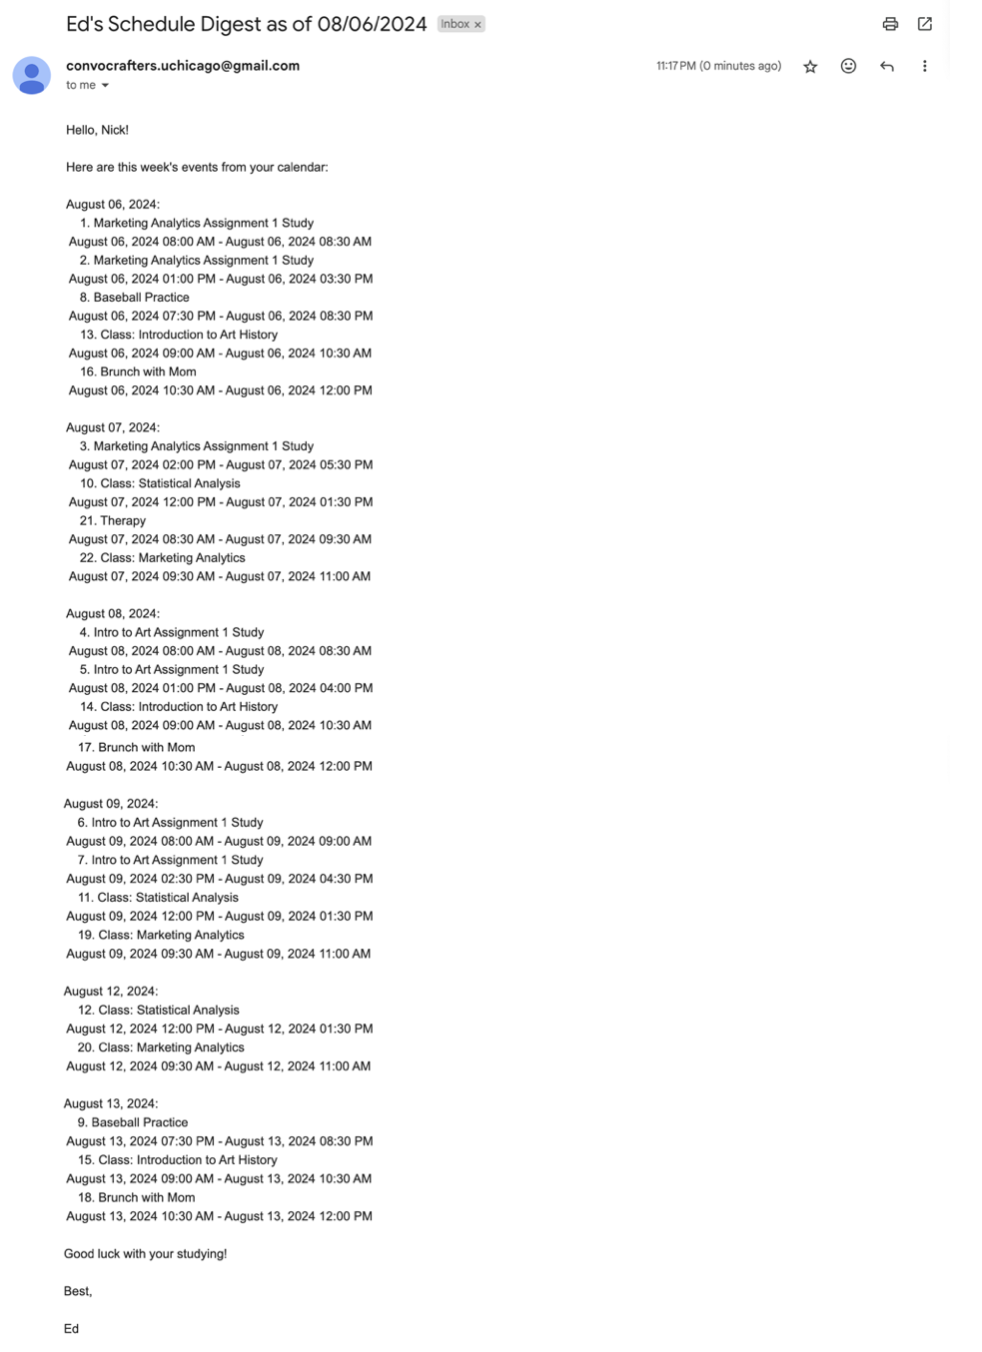